# Developement of multi objective operators

## Setup

### Standard library imports

In [1]:
%load_ext autoreload

In [2]:
import sys
import warnings
import logging

sys.path.append('..')
warnings.filterwarnings('ignore')
logger = logging.getLogger(__name__)

### Standard library imports

### Thrid Party libraries imports

In [237]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.spatial import distance

### Modules imports

In [235]:
%autoreload 2

from source.operators.continuous import crossover, mutation
from source.operators.multiobjective import assign_pareto_strength, is_dominated_solution, is_non_dominated_solution, collect_non_dominated_solutions, collect_dominated_solutions
from source.spea_optimizer import SPEAOptimizer
from source.utils import visual

### Sample objective

In [6]:
def schaffer_objective(x):
    return [x**2, (x - 2)**2]

In [7]:
def dummy_objective(x):
    return [x, np.random.rand() * x]

In [8]:
dummy_solutions = np.array([
    [2, 3],
    [2, 8],
    [3, 9],
    [3, 5],
    [4, 5],
    [5, 2],
    [5, 3],
    [5, 6],
    [8, 1],
    [9, 3],
])

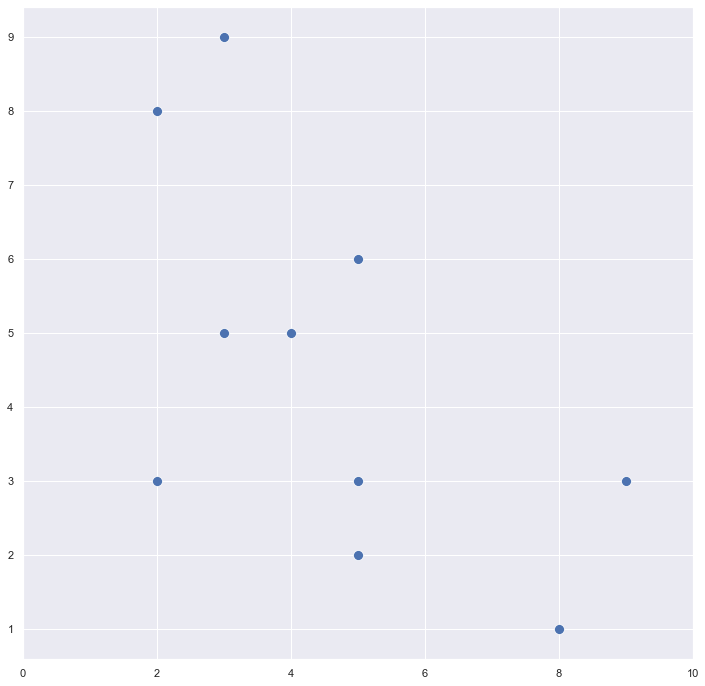

In [253]:
figure = plt.figure(figsize=[12, 12])
sns.set()

ax = sns.scatterplot(x=dummy_solutions[:, 0], y=dummy_solutions[:, 1], s=100)

_ = plt.xlim([0, 10])
_ = plt.xlim([0, 10])

### Visual test of dominating solutions

In [278]:
single_solution = np.array([3, 2])
non_dominated_solutions = collect_non_dominated_solutions(single_solution,dummy_solutions, mode="min")
dominated_solutions = collect_dominated_solutions(single_solution, dummy_solutions, mode="min")

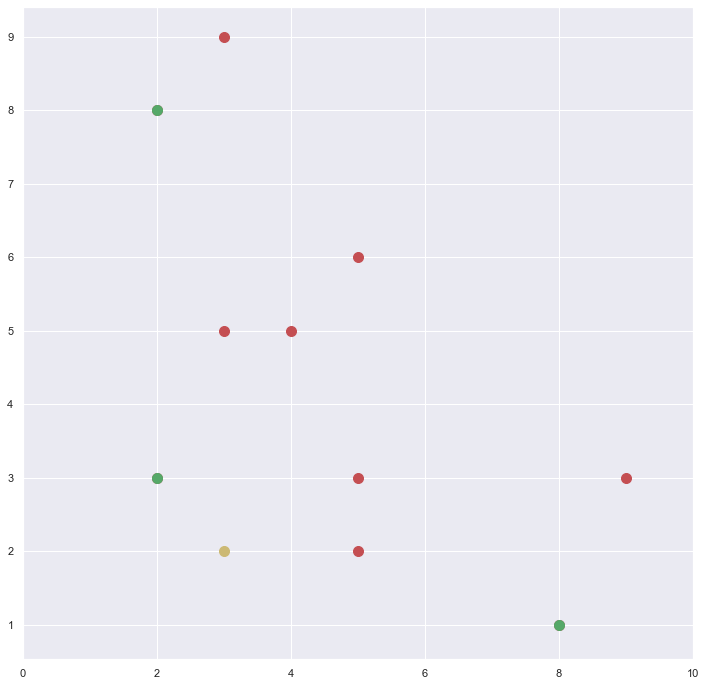

In [279]:
figure = plt.figure(figsize=[12, 12])
sns.set()

_ = plt.scatter(single_solution[0], single_solution[1], s=100, c="y")
_ = plt.scatter(x=dominated_solutions[:, 0], y=dominated_solutions[:, 1], s=100, c="r")
_ = plt.scatter(x=non_dominated_solutions[:, 0], y=non_dominated_solutions[:, 1], s=100, c="g")

_ = plt.xlim([0, 10])
_ = plt.xlim([0, 10])

In [290]:
for single_solution in ([0, 0], [5, 5], [6, 6], [8, 8], [10, 10]):
    print(f"S {single_solution[0], single_solution[1]} = {assign_pareto_strength(np.array(single_solution), dummy_solutions, mode='min')}")

S (0, 0) = 10
S (5, 5) = 9
S (6, 6) = 5
S (8, 8) = 4
S (10, 10) = 0
